# InD Trajectory Data Analysis

## Brief Introduction to InD

InD is a dataset collected by Aachen University, German. This dataset "contains more than 11500 road users including vehicles, bicyclists and pedestrians at intersections in Germany. The dataset consists of 10 hours of measurement data from four intersections".

This repository provides a data sample including less than 5% of the original dataset. It also provides a visualized insight into the dataset. For those interested in accessing the complete dataset, please follow this [link](https://www.ind-dataset.com/).

### Trajectory Types in InD

In inD, trajectories falls into these following categories:

- `pedestrian`
- `bicycle`
- `car`
- `truck_bus`


### Match Trajectory Data with Maps

According to meta records:

- Trajectory data files 00-06 are recorded in location 4 (denoted as inD_4)
- Trajectory data files 07-17 are recorded in location 1 (denoted as inD_1)
- Trajectory data files 18-29 are recorded in location 2 (denoted as inD_2)
- Trajectory data files 30-32 are recorded in location 3 (denoted as inD_3)

In [1]:
import sys

sys.path.append(".")

import warnings

warnings.filterwarnings("ignore")

import json

import matplotlib.transforms as mtransforms

from utils import levelx

with open("../map/map.config", "r") as f:
    configs = json.load(f)

data_path = "../trajectory/inD/data"
img_path = "../img/inD"
trajectory_types = ["car", "truck_bus", "bicycle", "pedestrian"]

## Data Analysis

The data analysis will first present visualizations of both the map and trajectory data and then analysis the speed distribution and lane changing frequency of vehicles, categorized by their types.

### Map and Trajectory Visualization

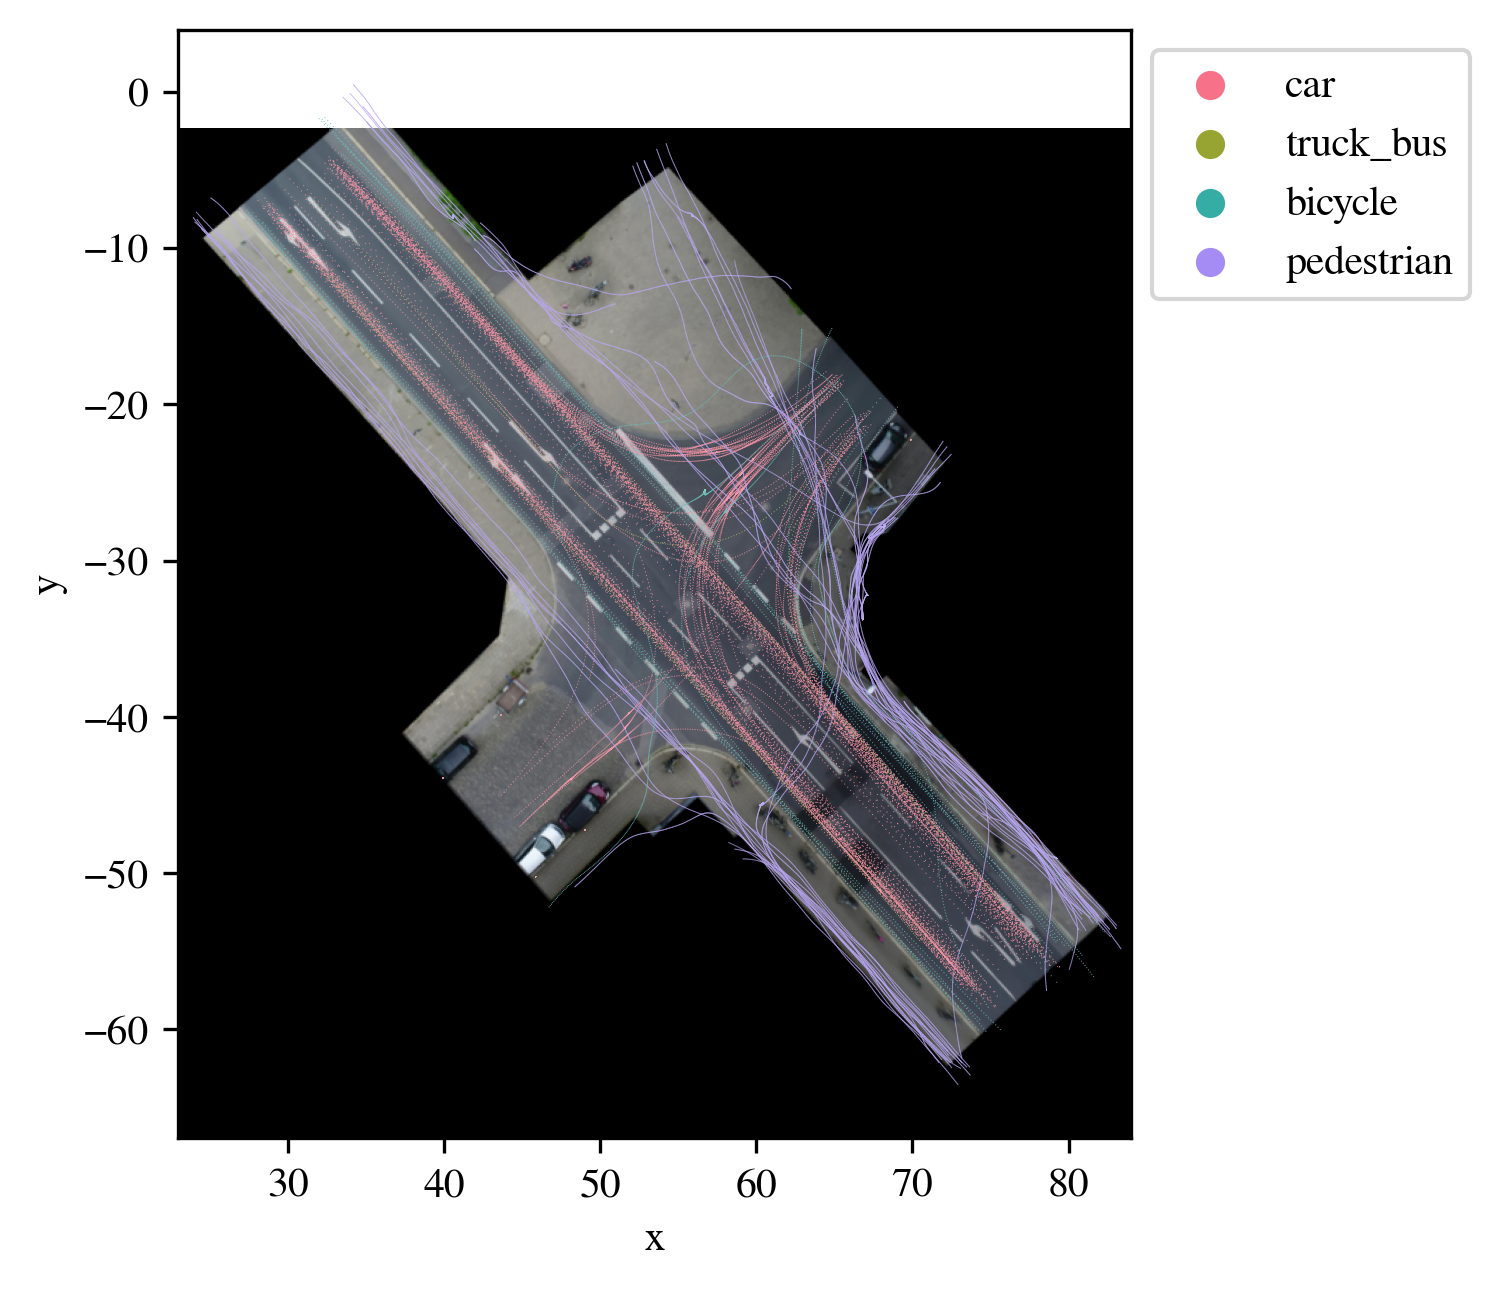

In [2]:
transform1 = mtransforms.Affine2D().scale(0.09).translate(4, -72.5)
levelx.plot_map_and_trajectories(
    "inD_1", data_path, img_path, transform1, trajectory_types, configs
)

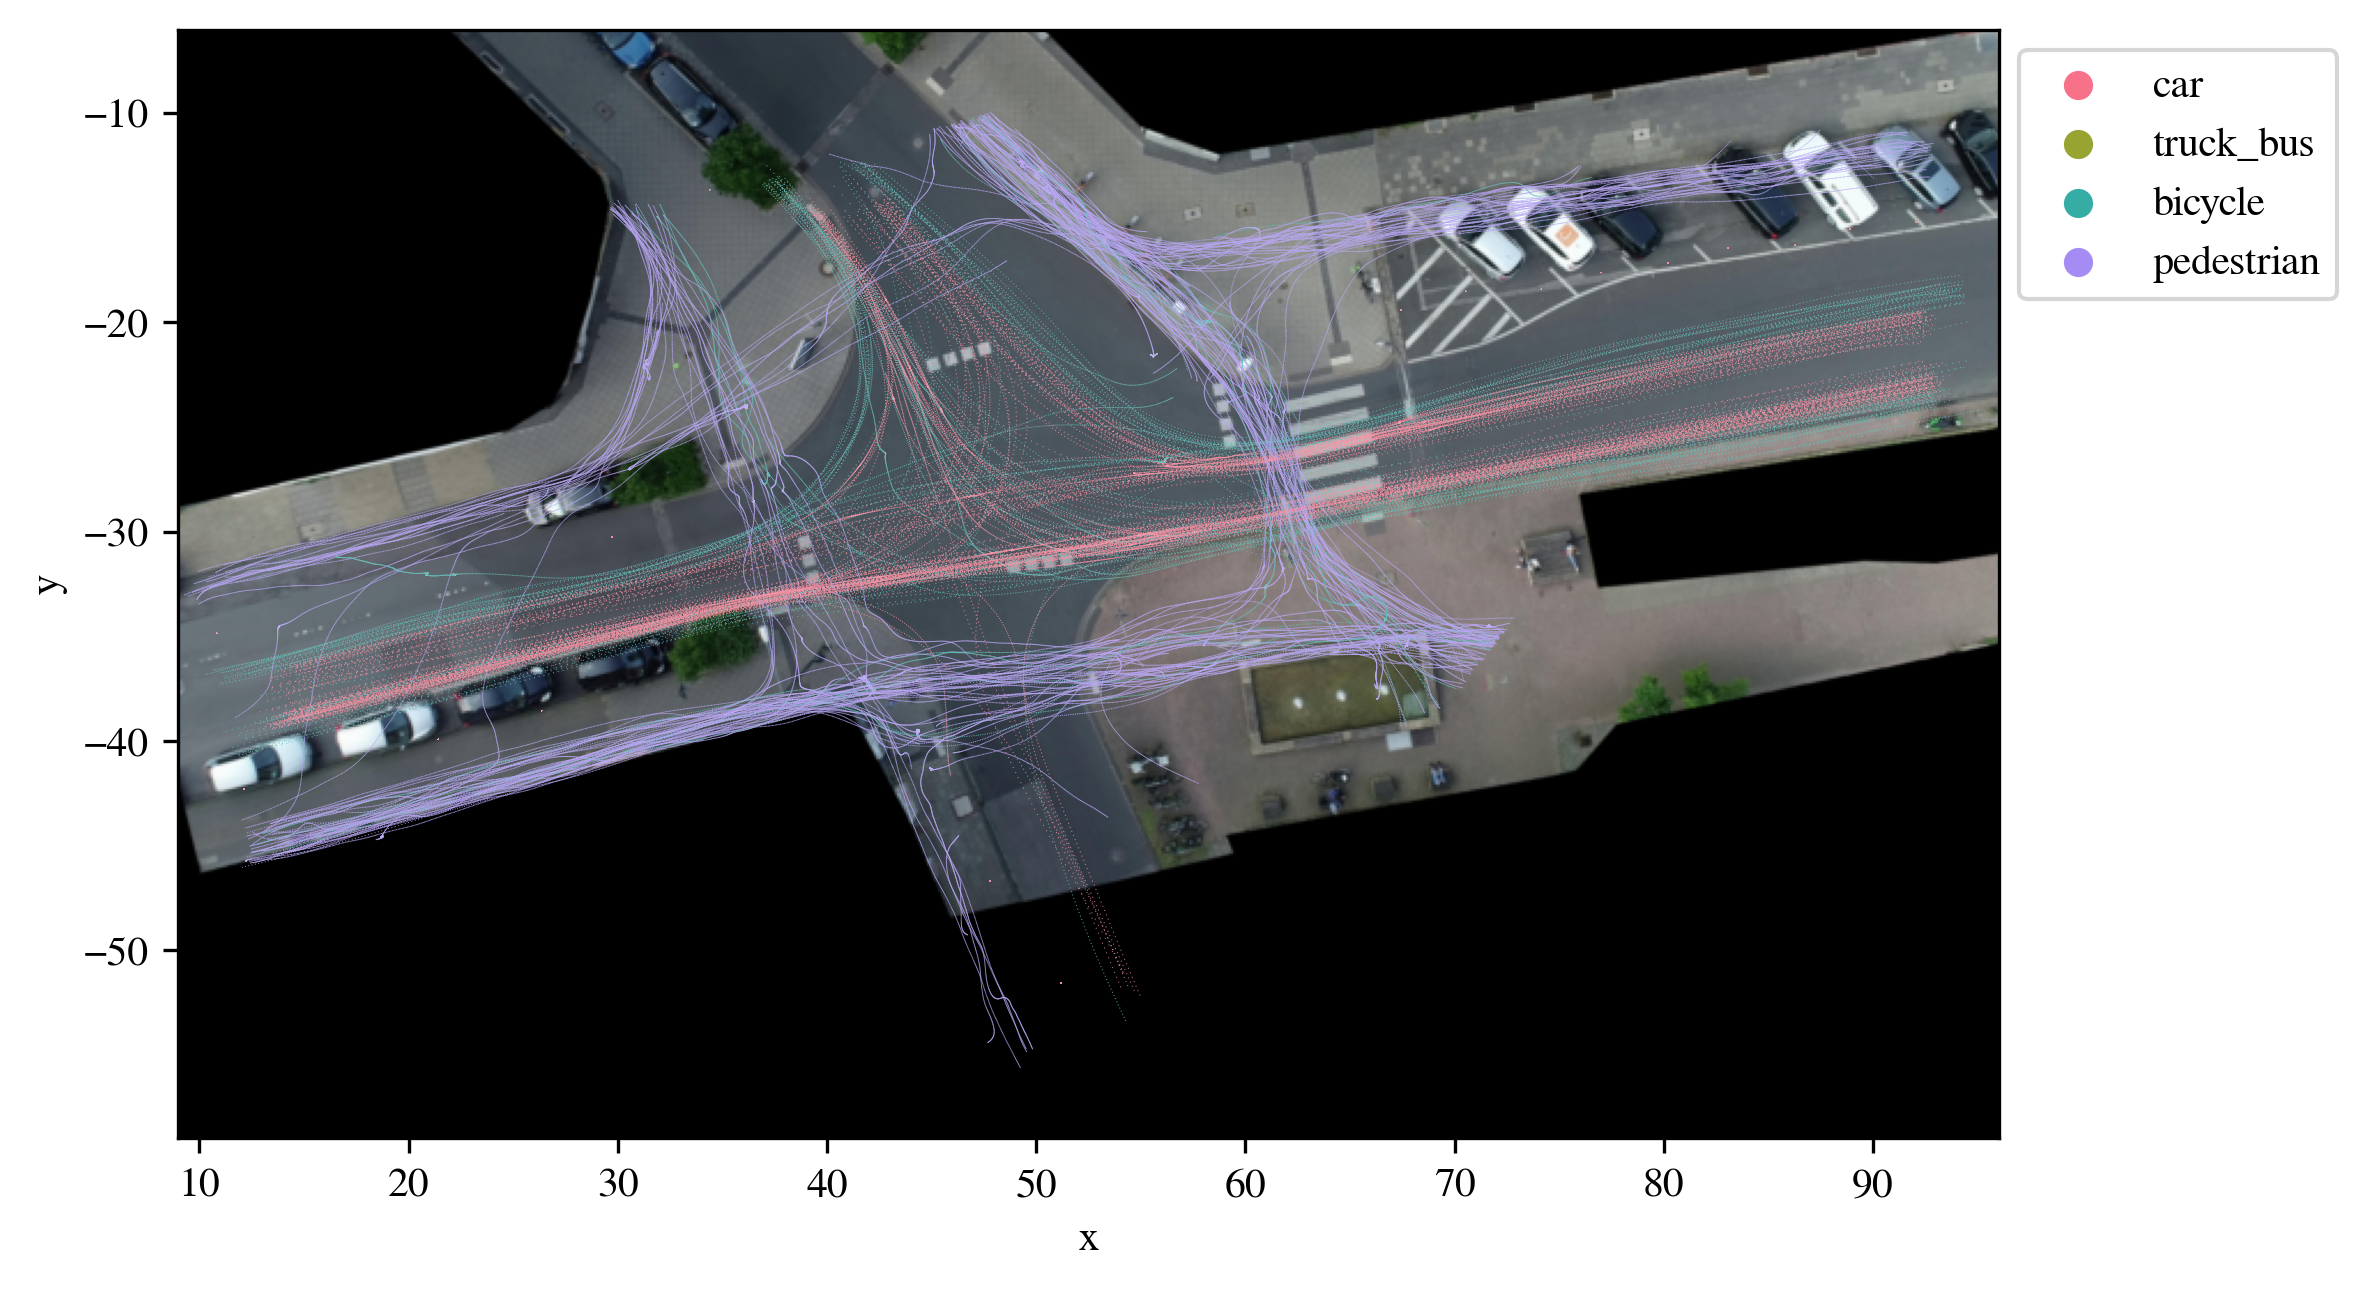

In [3]:
transform2 = mtransforms.Affine2D().scale(0.11).translate(-5, -80)
levelx.plot_map_and_trajectories(
    "inD_2", data_path, img_path, transform2, trajectory_types, configs
)

In [4]:
transform3 = mtransforms.Affine2D().scale(0.11).translate(-6, -82)
levelx.plot_map_and_trajectories(
    "inD_3", data_path, img_path, transform3, trajectory_types, configs
)

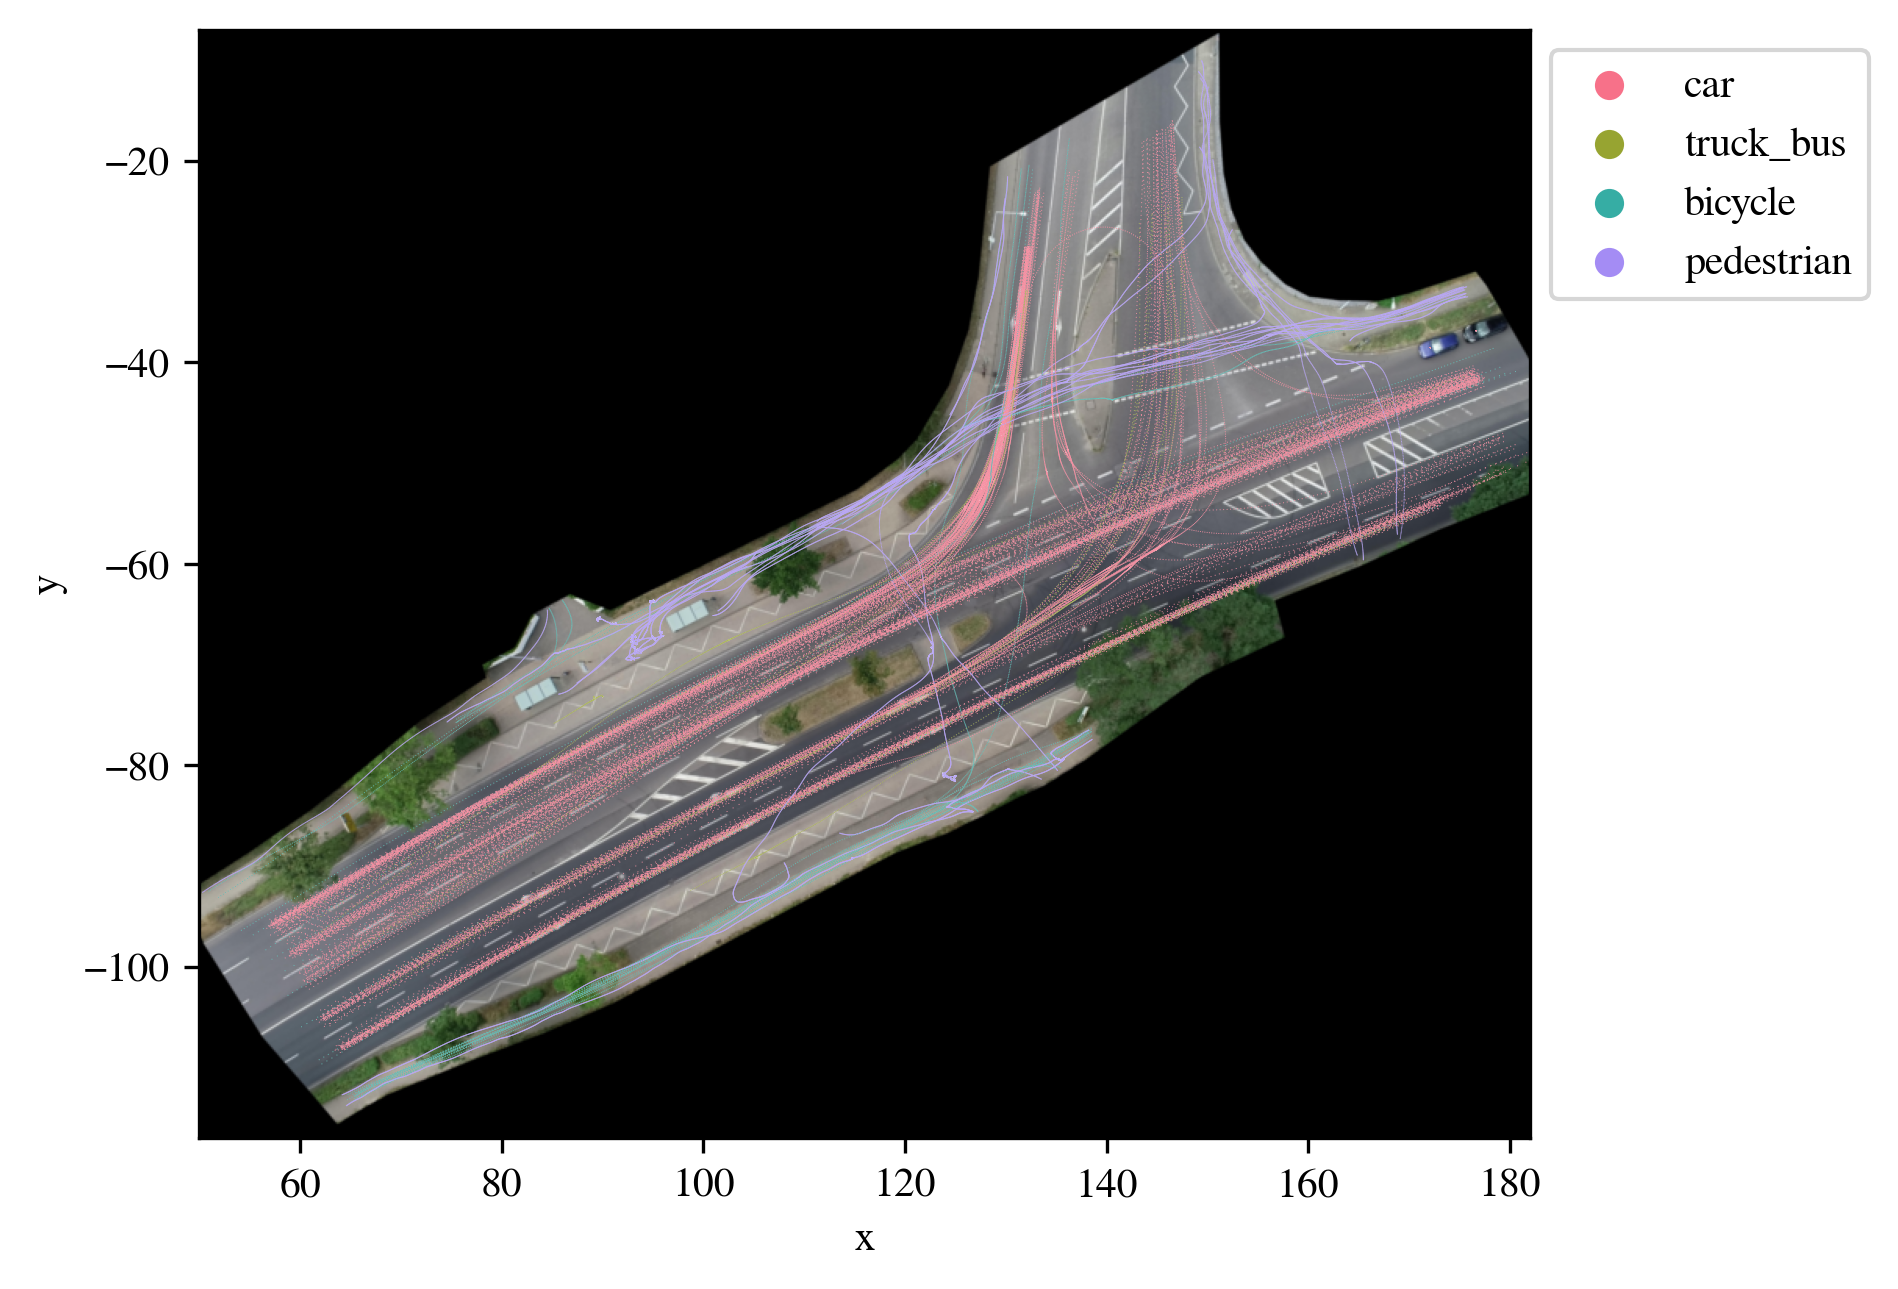

In [ ]:
transform4 = mtransforms.Affine2D().scale(0.155).translate(-2, -120)
levelx.plot_map_and_trajectories(
    "inD_4", data_path, img_path, transform4, trajectory_types, configs
)

### Proportion of Trajectory Types

As illustrated in the subsequent figures, the distribution of various types of traffic participants exhibits significant variation across different locations.

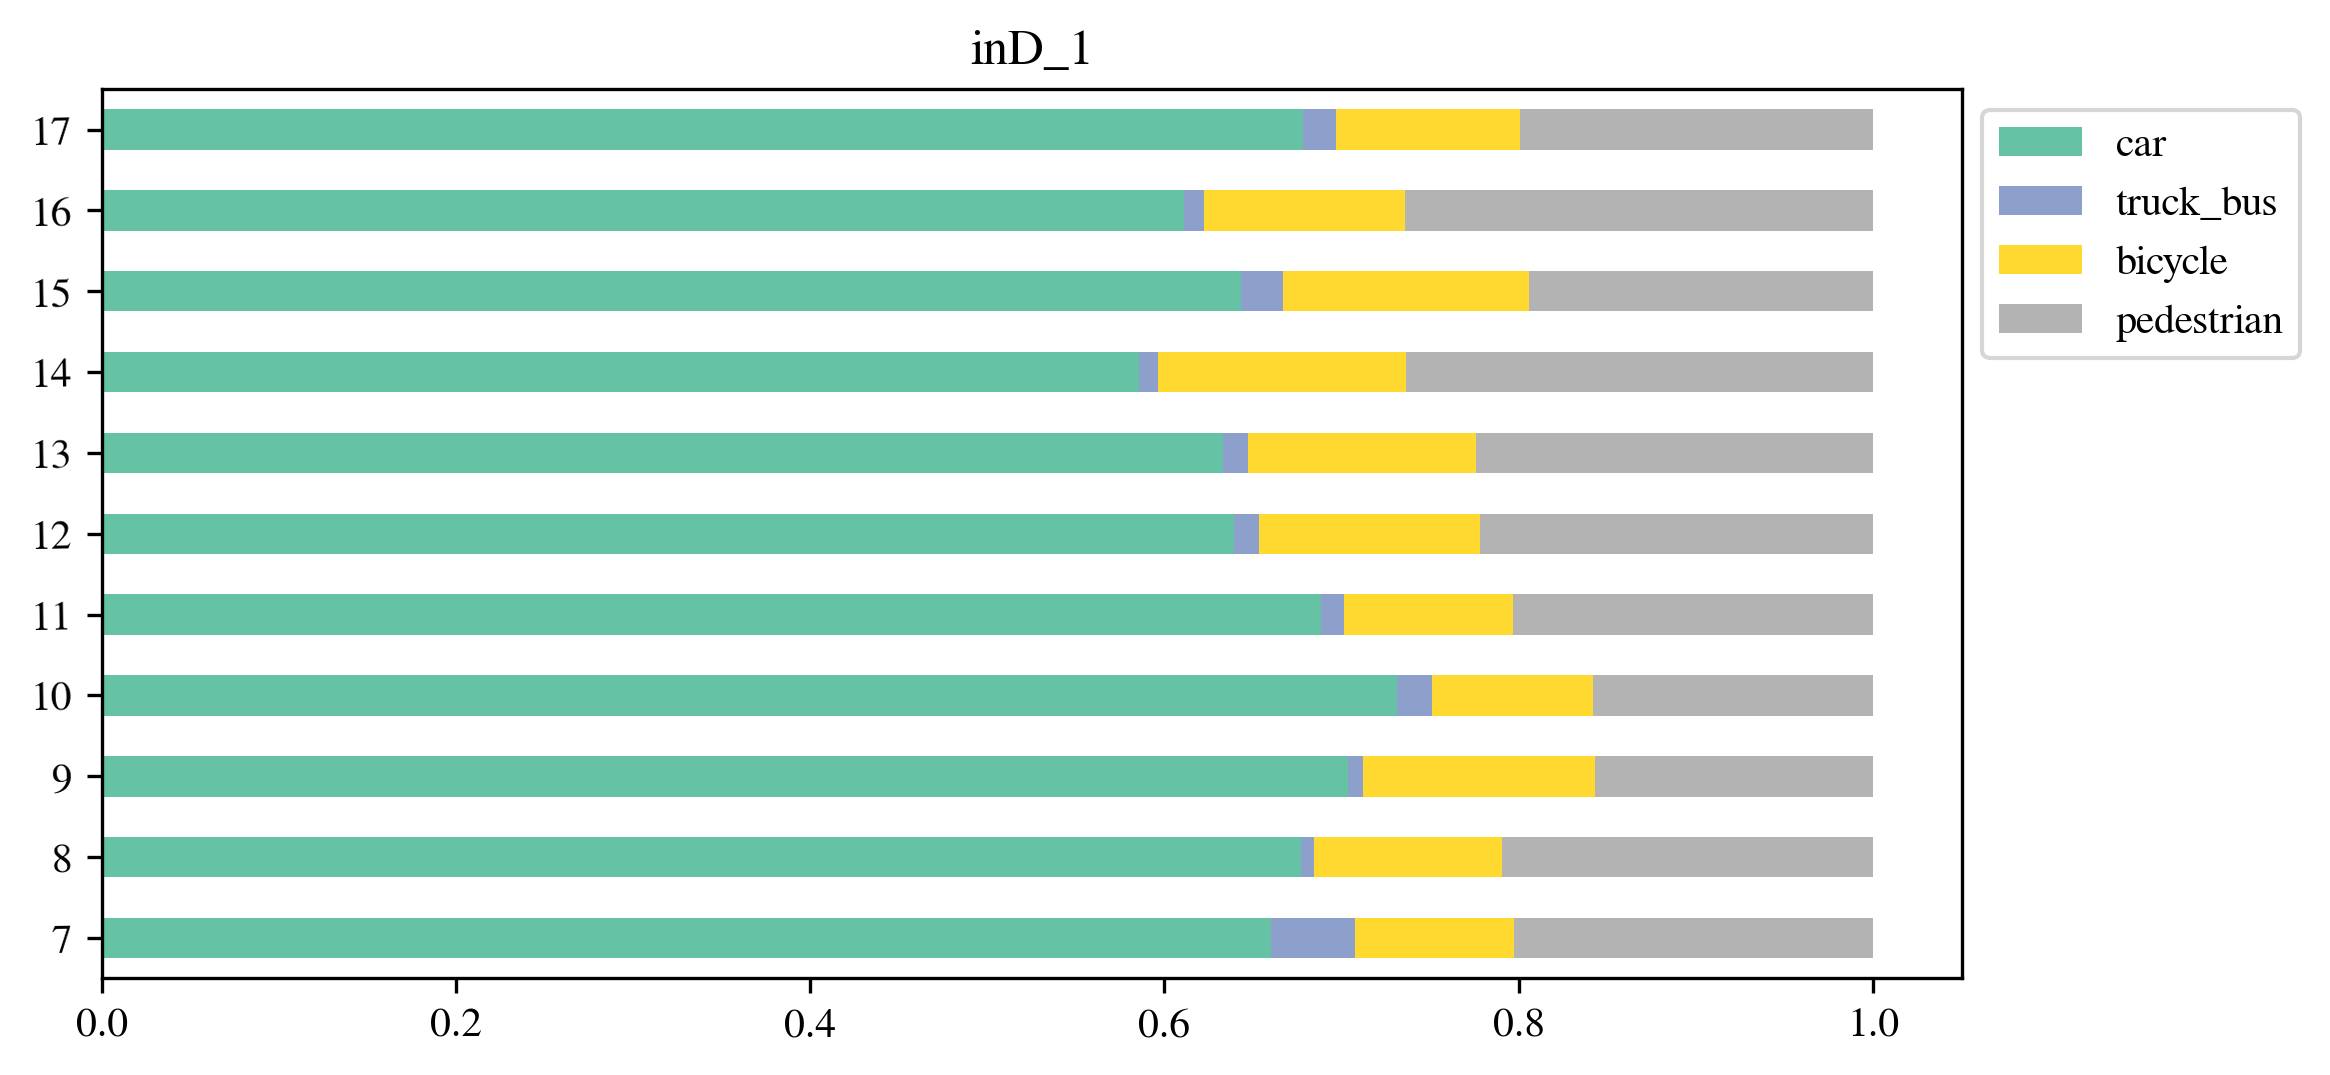

In [ ]:
levelx.plot_class_proportion("inD_1", data_path, trajectory_types, configs)

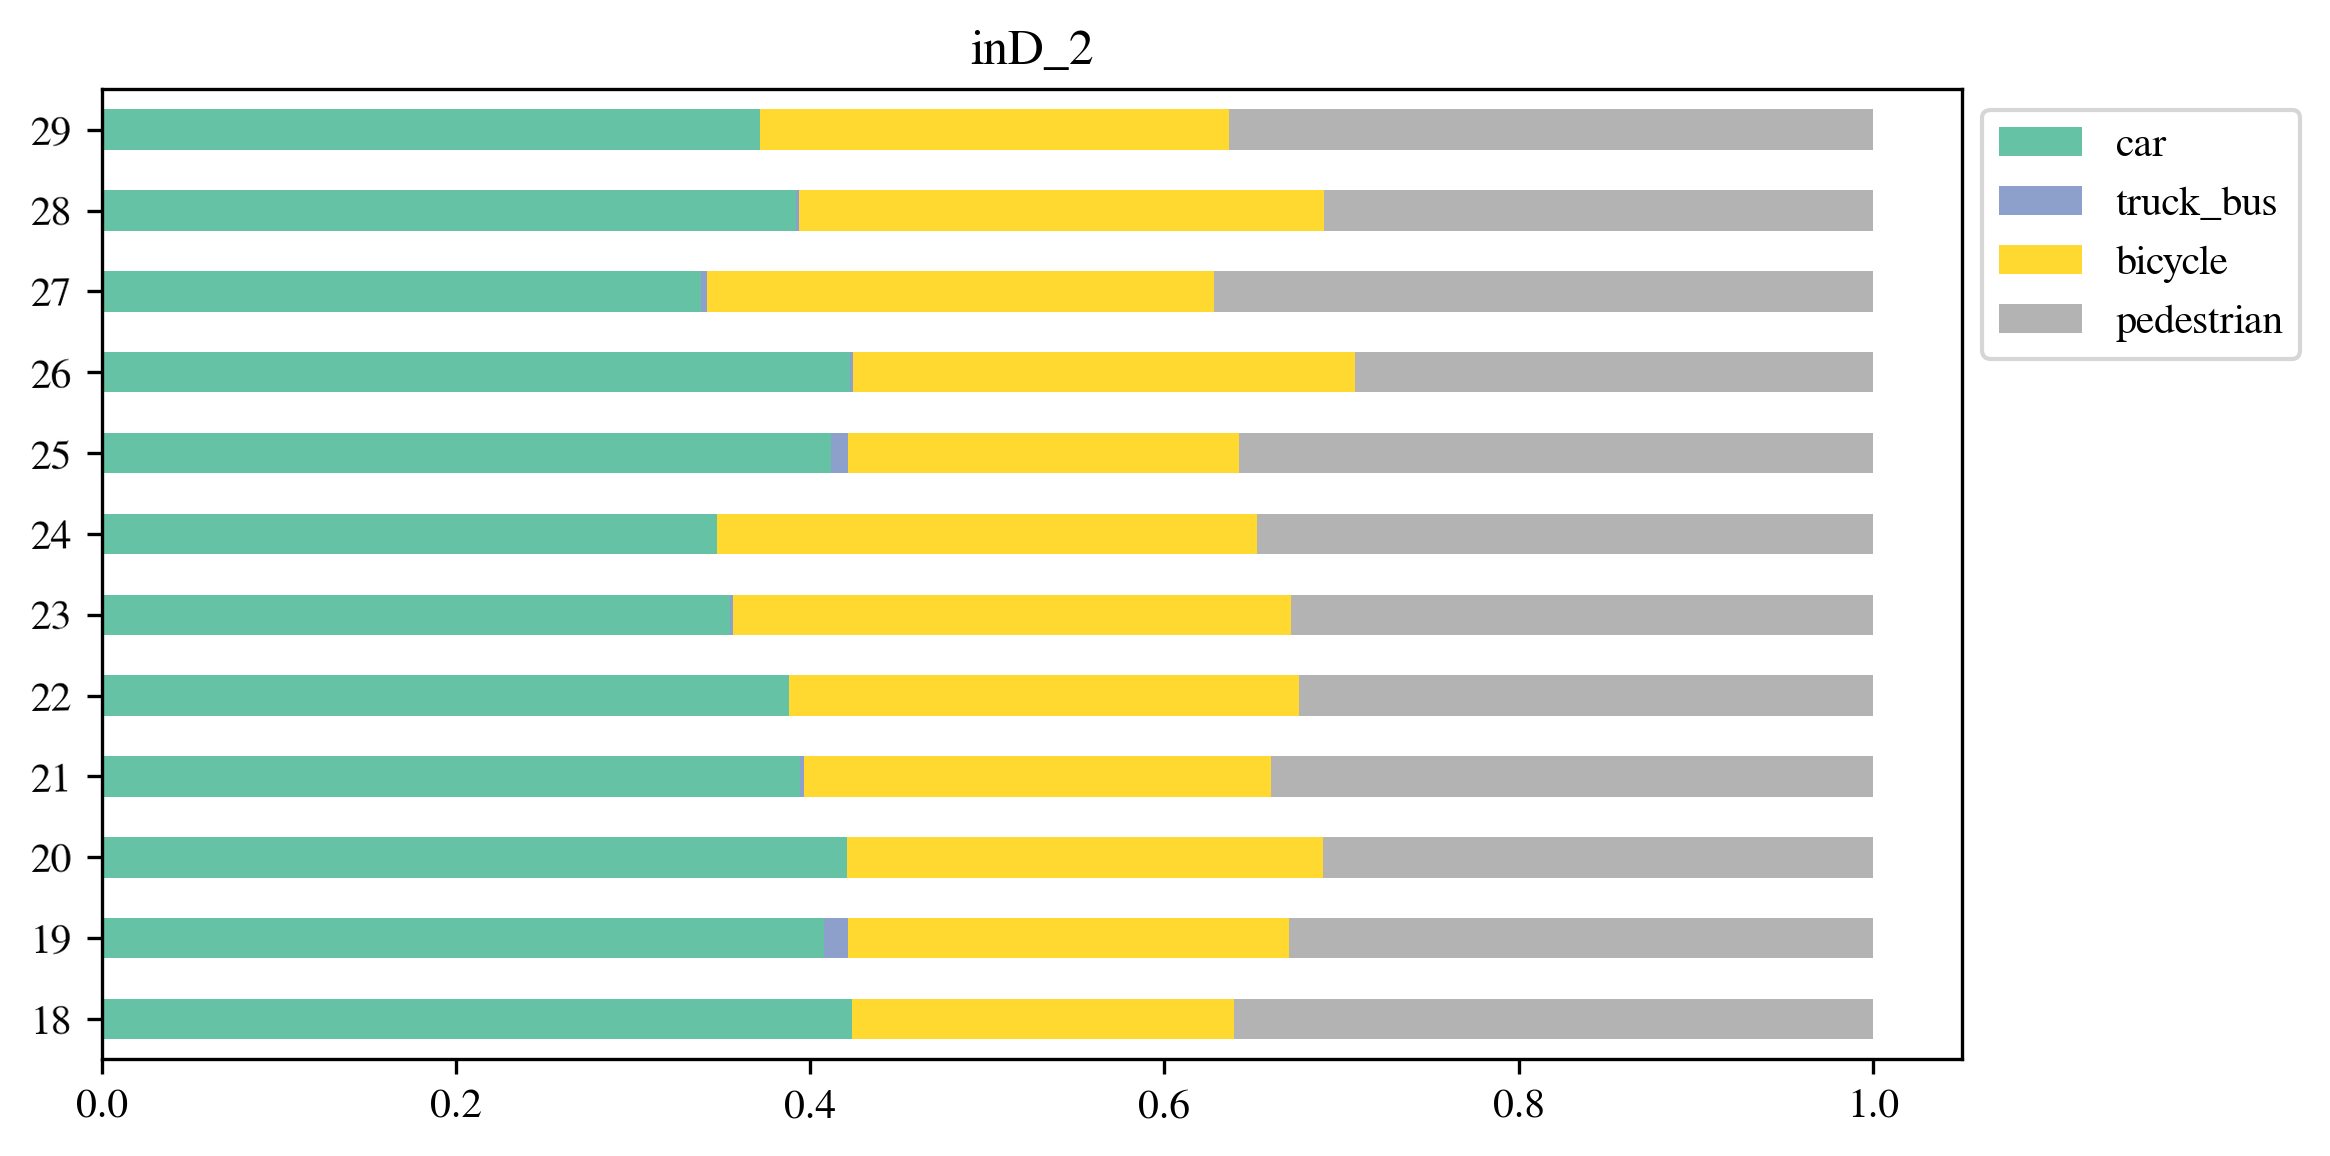

In [ ]:
levelx.plot_class_proportion("inD_2", data_path, trajectory_types, configs)

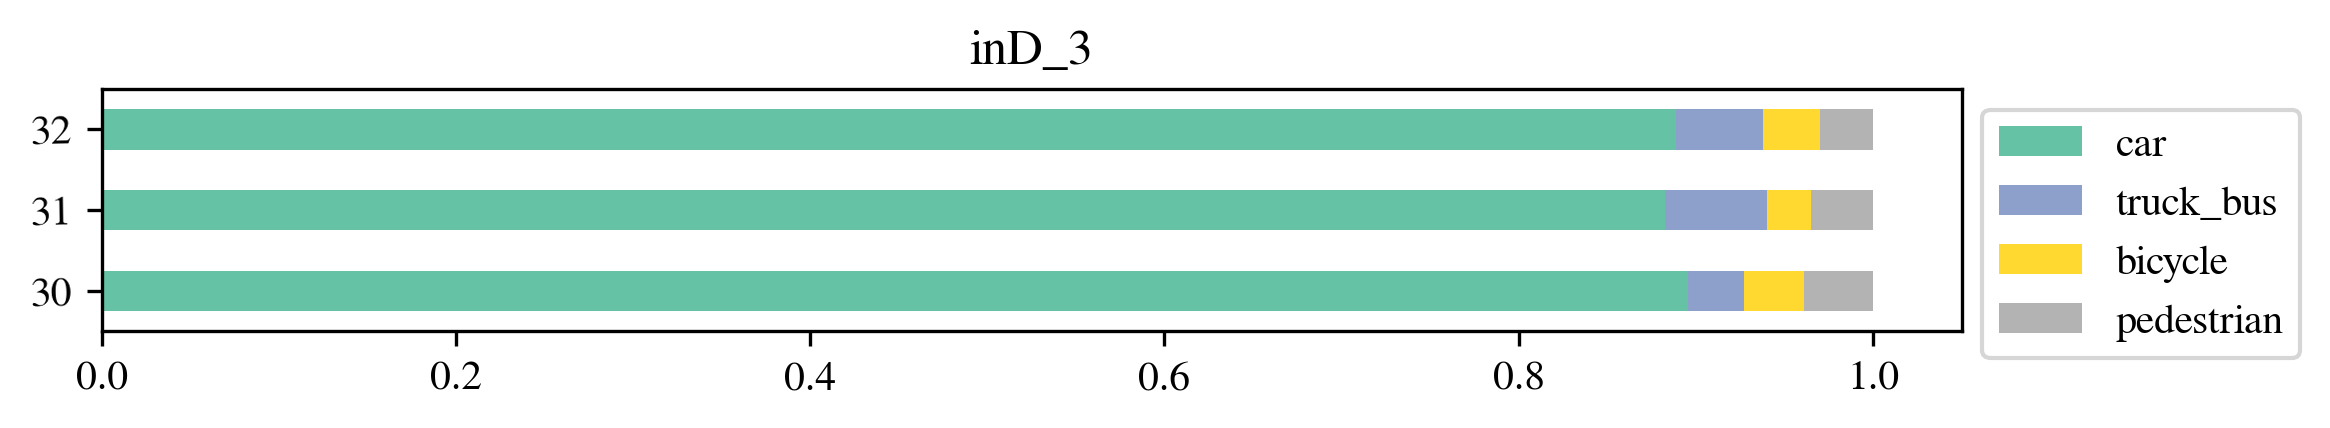

In [ ]:
levelx.plot_class_proportion("inD_3", data_path, trajectory_types, configs)

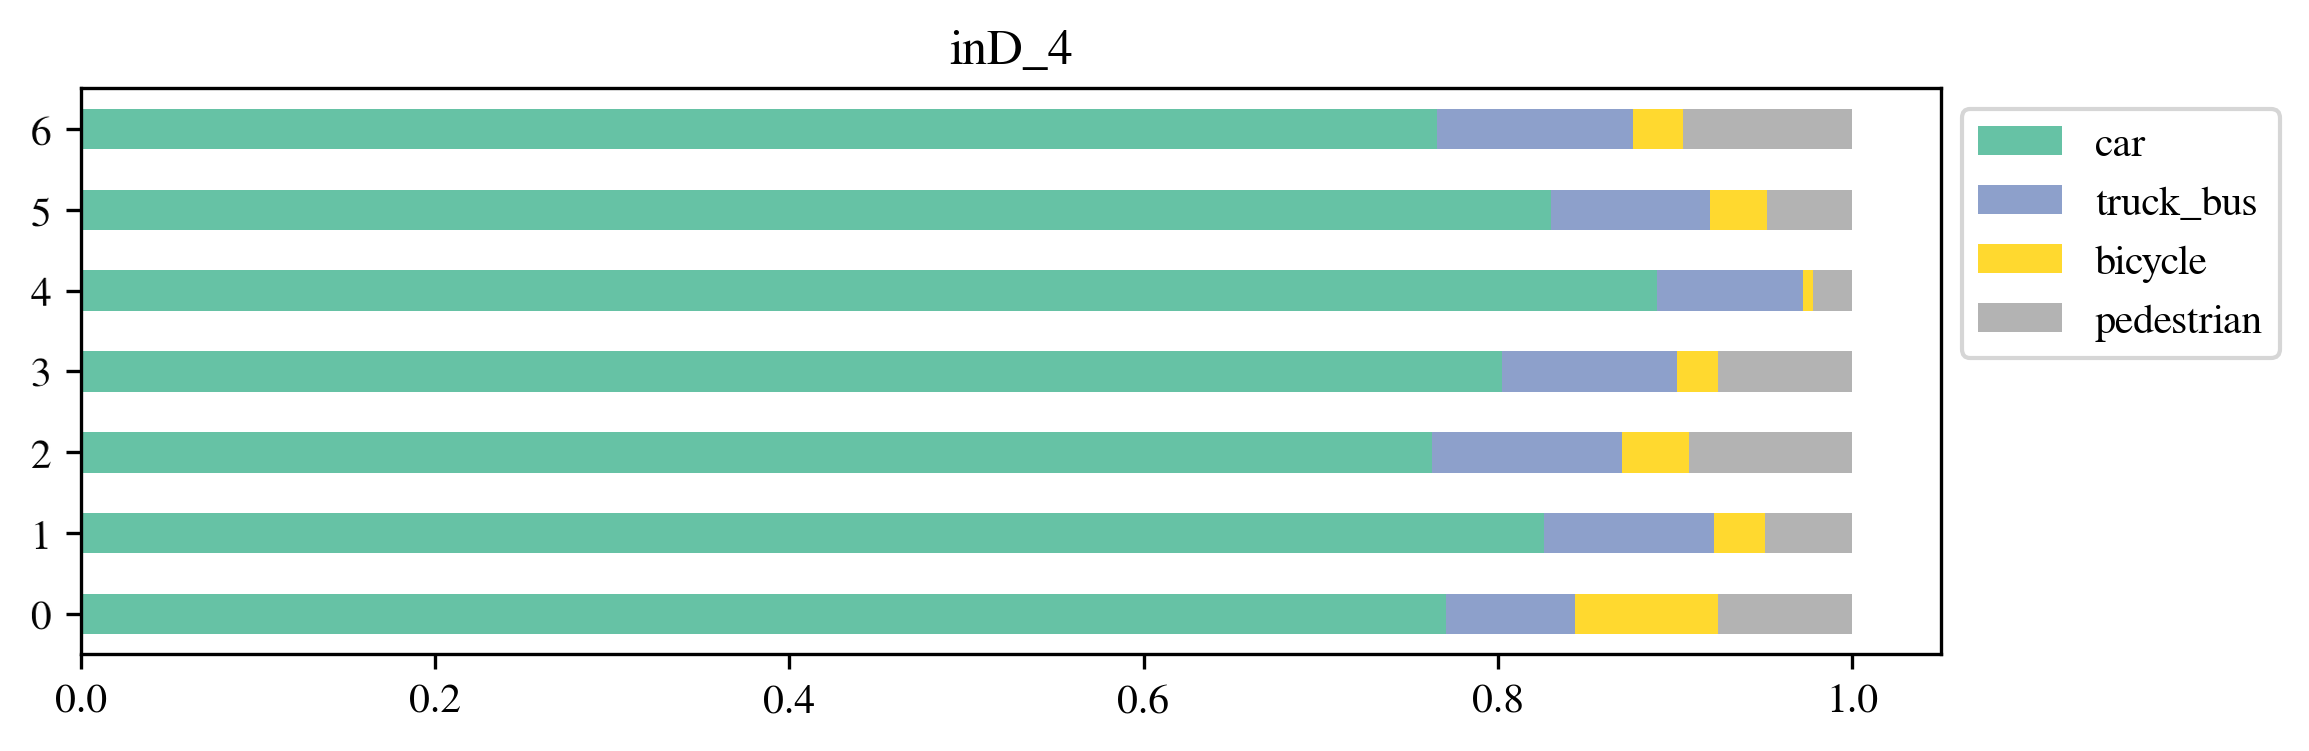

In [ ]:
levelx.plot_class_proportion("inD_4", data_path, trajectory_types, configs)

### Speed Distribution

In [ ]:
levelx.plot_speed_distribution("inD", data_path, trajectory_types, configs)

AttributeError: module 'utils.levelx' has no attribute 'plot_speed_distribution'

## Angle Distribution

In [ ]:
def angle_dist_vis(map_config, type, all_files=False):
    file_list = (
        map_config["track_files"] if all_files else [map_config["track_files"][0]]
    )
    for file_id in file_list:
        df = pd.read_csv(
            "../data/tracks/%s/%03d_tracks.csv" % (map_config["map_name"], file_id)
        )
        bin_num = 72
        theta = np.linspace(0.0, 2 * np.pi, bin_num, endpoint=False)
        angle = df[df["type"] == type]["angle"]
        for i, a in enumerate(angle):
            if a < 0:
                angle[i] = angle[i] + 2 * np.pi
        radii = np.zeros(bin_num)
        for a in angle:
            radii[int(a / (2 * np.pi / bin_num))] += 1
        ax = plt.subplot(111, polar=True)
        bars = ax.bar(theta, np.log10(radii), width=(2 * np.pi) / bin_num, bottom=4)
        for r, bar in zip(radii, bars):
            bar.set_facecolor("turquoise")
            bar.set_alpha(0.5 + 0.5 * r / sum(radii))
        fig = plt.gcf()
        fig.set_size_inches((6, 6))
        ax = plt.gca()
        ax.set_title(file_id)
        plt.show()

The distribution of angle in all track files of map I_inD_0_DEU are similar, so we only plot the first file.

In [ ]:
angle_dist_vis(configs[map_list[0]], "car")

The distribution of angle in all track files of map I_inD_1_DEU are similar, so we only plot the first file.

In [ ]:
angle_dist_vis(configs[map_list[1]], "car")

The distribution of angle in all track files of map I_inD_2_DEU are similar, so we only plot the first file.

In [ ]:
angle_dist_vis(configs[map_list[1]], "car")

The distribution of angle in all track files of map I_inD_3_DEU are similar, so we only plot the first file.

In [ ]:
angle_dist_vis(configs[map_list[3]], "car")

## Traffic Density

In [ ]:
def traffic_density_vis(map_config, x_lim, y_lim):
    for file_id in map_config["track_files"]:
        df = pd.read_csv(
            "../data/tracks/%s/%03d_tracks.csv" % (map_config["map_name"], file_id)
        )
        count = df.groupby(["frame", "type"]).size().unstack(level=1)
        count.plot(kind="line")
        ax = plt.gca()
        ax.set_xlim(x_lim)
        ax.set_ylim(y_lim)
        ax.set_title(file_id)
        fig = plt.gcf()
        fig.set_size_inches((8, 6))
        plt.set_cmap("Set2")
        plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
        plt.show()

In [ ]:
traffic_density_vis(configs[map_list[0]], [0, 11000], [0, 20])

In [ ]:
traffic_density_vis(configs[map_list[1]], [0, 12000], [0, 20])

In [ ]:
traffic_density_vis(configs[map_list[2]], [0, 12000], [0, 30])

In [ ]:
traffic_density_vis(configs[map_list[3]])